# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Чтение файла с данными и вывод общей информации

#### Импорт библиотеки pandas

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')

#### Вывод первых 10 строчек датафрейма data на экран

In [3]:
data.head(pd.set_option('display.max_columns', None))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### Вывод основной информации о датафрейме

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Описание данных

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Определение наличия дубликатов

In [6]:
data.duplicated().sum() 

0

#### Построение гистограмм для всех числовых столбцов таблицы

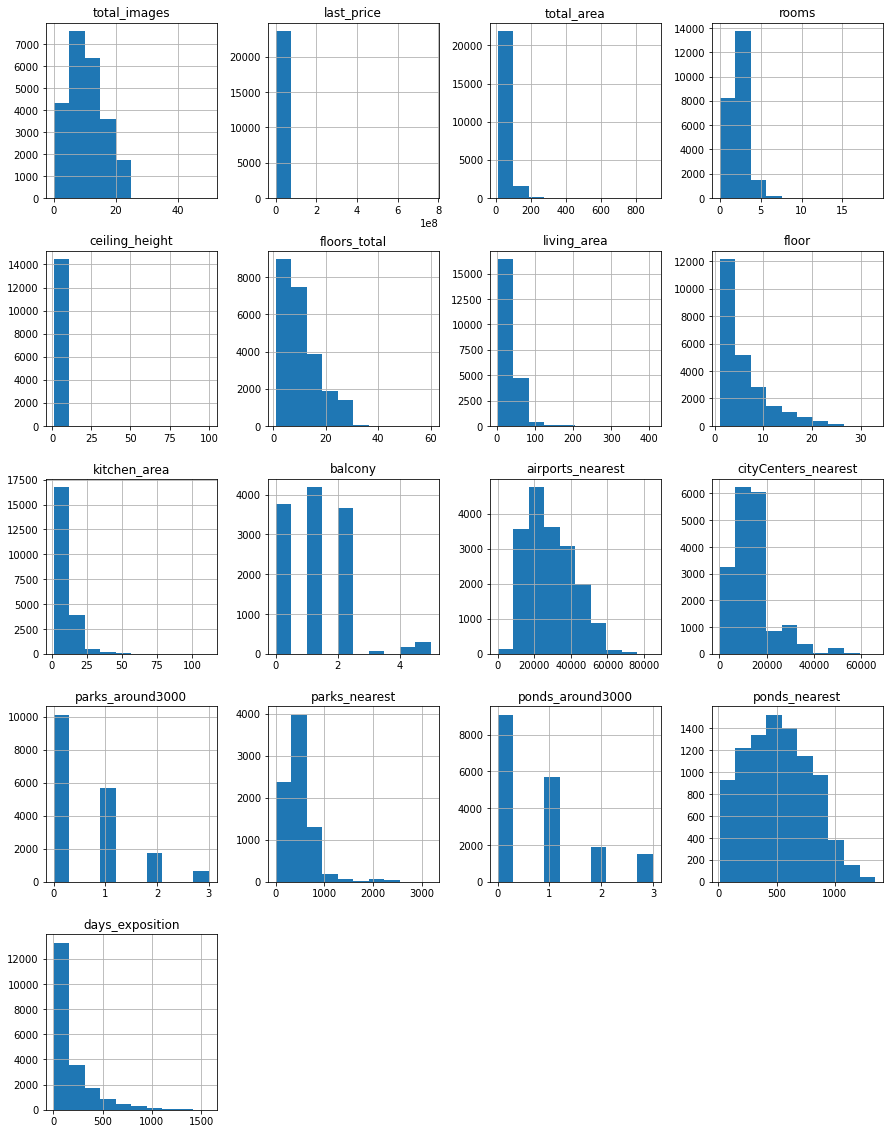

In [7]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### Определение кол-ва пропусков в столбцах

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски могли возникнуть из-за человеческого фактора (данные были удалены случайно или намерено, сотрудник не внес данные) или в результате сбоя в базе данных при выгрузке

#### Обработка пропусков

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [10]:
data.dropna(subset=['floors_total'], inplace=True)

In [11]:
data['living_area'].fillna(data['living_area'].mean(), inplace=True)

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [13]:
#data['kitchen_area'].fillna(data['kitchen_area'].mean(), inplace=True)

In [14]:
data['balcony'] = data['balcony'].fillna(value=0)

In [15]:
data.dropna(subset=['locality_name'], inplace=True)

In [16]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)

In [17]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

In [18]:
import numpy as np
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

#### Изменение типов данных

В столбцах floors_total,balcony, parks_around3000, ponds_around3000, days_exposition должен быть тип int, т.к. значения целые. 
В столбце first_day_exposition - object - должен быть тип datetime. 
В столбце is_apartment - должен быть тип bool. 

In [20]:
data['floors_total'] = data['floors_total'].astype('int')

In [21]:
data['balcony'] = data['balcony'].astype('int')

In [22]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [23]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [25]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

#### Обработка уникальных значений в столбце locality_name и устранение неявных дубликатов

In [27]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [28]:
data['locality_name'] = (data['locality_name'].str.replace('ё', 'е').replace(['поселок городского типа'], 'поселок', regex=True)
) 

In [29]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское

### Добавление в таблицу новых столбцов

In [30]:
data['sm_price'] = (data['last_price']/data['total_area']).round(2)

In [31]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [32]:
data['month'] = data['first_day_exposition'].dt.month

In [33]:
data['year'] = data['first_day_exposition'].dt.year

In [34]:
def categorize_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [35]:
data['categorize_floor'] = data.apply(categorize_floor, axis=1)

In [36]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)

In [37]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,categorize_floor,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,34.462781,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,34.462781,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,<NA>,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,88524.59,6,2,2017,другой,15.0


### Исследовательский анализ данных

#### Изучение параметров объектов и построение гистограмм:

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

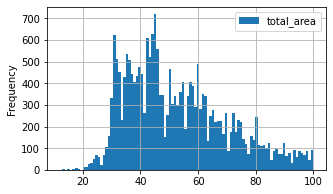

In [38]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (12,100))
data['total_area'].describe()

Большинство квартир имет площадь от 30 до 70 кв.м.

count    23565.000000
mean        34.455452
std         21.154976
min          2.000000
25%         19.000000
50%         31.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

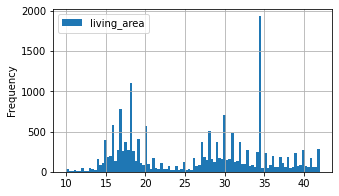

In [39]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, range = (10,42), figsize = (5,3))
data['living_area'].describe()

Распространена жилая площадь в пределах 14 и 21 м, а также 26 и 36 м, заметно два выделяющихся пика: квартиры с площадью примерно 18 и 34 кв.м.

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

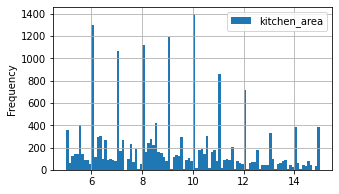

In [40]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, range = (5,15), figsize = (5,3))
data['kitchen_area'].describe()

Площадь большинства кухонь варьируется от 5 до 15 м. Большинство предложений имеет площадь кухни равную 10,5 кв. м., также выделяются предложения с размером кухни равные 6, 7, 8, 9 и 10 кв. м.

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

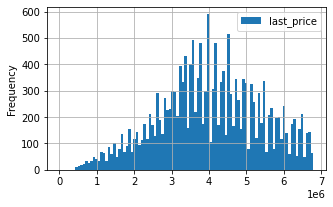

In [41]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (1.219000e+04,6.790000e+06), figsize = (5,3))
data['last_price'].describe()

Цена большинства квартир варьируется от 2 до 6 млн., 4 млн. руб. - самая распространенная цена.

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

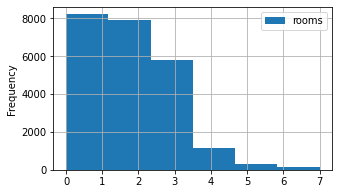

In [42]:
data.plot(y = 'rooms', kind = 'hist', bins = 6, grid=True, range = (0,7), figsize = (5,3))
data['rooms'].describe()

Большую часть предложений составляют одно- и двухкомнатные квартиры,с ростом кол-ва комнат предложений становится меньше.

In [43]:
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10

count    23565.000000
mean         2.698746
std          0.253630
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

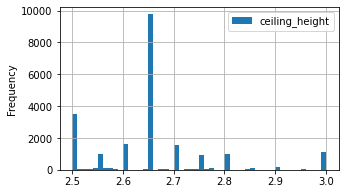

In [44]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 50, grid=True, range = (2.5,3), figsize = (5,3))
data['ceiling_height'].describe()

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров, самое распространенное - 2,65 м.

<AxesSubplot:xlabel='categorize_floor'>

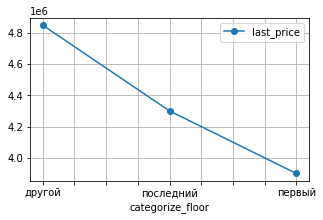

In [45]:
data.pivot_table(index='categorize_floor', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False).plot(grid=True, style='o-', figsize=(5, 3))

<AxesSubplot:xlabel='categorize_floor', ylabel='count'>

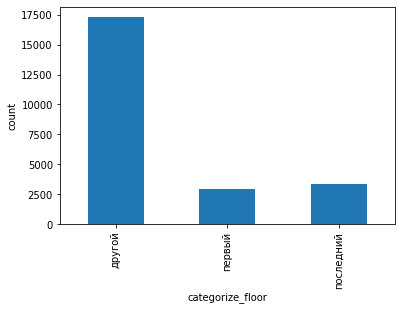

In [46]:
data.groupby(by='categorize_floor')['categorize_floor'].count().plot(kind='bar', ylabel = 'count')

Большинство предложений квартир расположены между 2 и предпоследним этажом, меньше всего вариантов на 1 этаже.

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

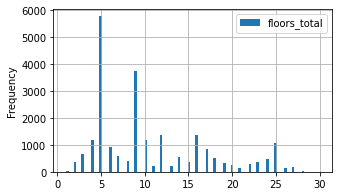

In [47]:
data.plot(y = 'floors_total', kind = 'hist', bins = 100, grid=True, range = (1,30), figsize = (5,3))
data['floors_total'].describe()

Больше всего квартир продается в 5-этажных домах, также много предложений в 9-этажках.

count    18064.000000
mean        14.186504
std          8.621131
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest_km, dtype: float64

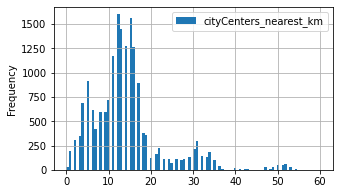

In [48]:
data.plot(y = 'cityCenters_nearest_km', kind = 'hist', bins = 100, grid=True, range = (0,60), figsize = (5,3))
data['cityCenters_nearest_km'].describe() 

Максимальное расстояние до центра 65 км, большинство квартир расположено в пределах 5-20 км от центра, есть 3 выделающиеся значения в пределах 5, 12 и 15 км.

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

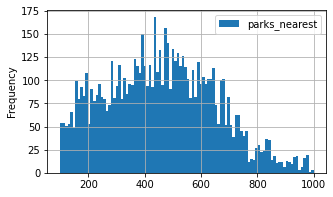

In [49]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, range = (100,1000), figsize = (5,3))
data['parks_nearest'].describe()

В основном расстояние до парка варьируется от 200 до 750 м

Вывод:

Площадь большинства предлагаемых квартир варьируется от 30 до 70 кв.м.
Жилая площадь большинства квартир в пределах 14 и 21 м, а также 26 и 36 м, а площадь кухонь варьируется от 5 до 15 м. Большинство предложений имеет площадь кухни равную 10,5 кв. м.
Цена на большинство квартир варьируется от 2 до 6 млн., 4 млн. руб. - самая распространенная цена.
Большую часть предложений составляют одно- и двухкомнатные квартиры,с ростом кол-ва комнат предложений становится меньше.
Большинство вариантов имеют высоту потолков от 2,5 до 3 метров, самое распространенное - 2,65 м.
Большинство предложений квартир расположены между 2 и предпоследним этажом, меньше всего вариантов на 1 этаже.
Больше всего квартир продается в 5-этажных домах, также много предложений в 9-этажках.
Максимальное расстояние до центра 65 км, большинство квартир расположено в пределах 5-20 км от центра, есть 3 выделающиеся значения в пределах 5, 12 и 15 км.
В основном расстояние до парка варьируется от 200 до 750 м.

#### Изучение скорости продажи квартир (столбец days_exposition)

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

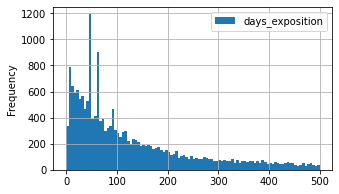

In [50]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, range = (0,500), figsize = (5,3))
data['days_exposition'].describe()

Среднее время продажи квартир 156 дня, а медианное 73 дней (более точное). 
Быстрыми продажами можно считать до 150 дней.
Некоторые квартиры продаются больше 230 дней, максимальное кол-во дней обьявления 1580.

#### Определение факторов, которые больше всего влияют на общую стоимость объекта

In [51]:
#корреляция
data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr()

,kitchen_area,last_price,living_area,rooms,total_area
kitchen_area,1.000000,0.361234,0.100305,0.092024,0.409956
last_price,0.361234,1.000000,0.635939,0.442934,0.739123
living_area,0.100305,0.635939,1.000000,0.898936,0.922847
rooms,0.092024,0.442934,0.898936,1.000000,0.811611
total_area,0.409956,0.739123,0.922847,0.811611,1.000000


In [52]:
def quartile_range(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    qr = q3 - q1
    dataqr = data.loc[(data[column] < q3 + 1.5*qr) & (data[column] > q1 - 1.5*qr), column]
    return dataqr

list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height','floor', 'parks_nearest', 'cityCenters_nearest_km', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

In [53]:
data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr()

,kitchen_area,last_price,living_area,rooms,total_area
kitchen_area,1.000000,0.910083,-0.922535,-0.961218,-0.315919
last_price,0.910083,1.000000,-0.749238,-0.809036,-0.016091
living_area,-0.922535,-0.749238,1.000000,0.986872,0.638675
rooms,-0.961218,-0.809036,0.986872,1.000000,0.550674
total_area,-0.315919,-0.016091,0.638675,0.550674,1.000000


<AxesSubplot:xlabel='total_area'>

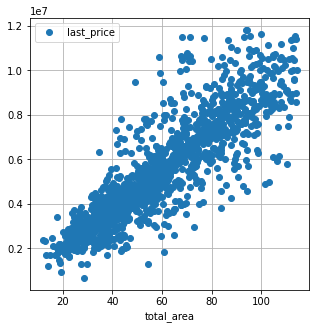

In [54]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))

<AxesSubplot:xlabel='living_area'>

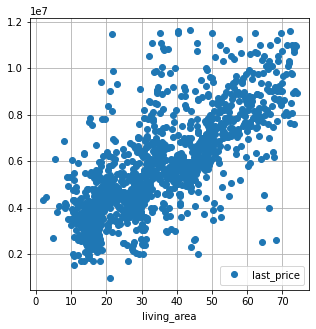

In [55]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))

<AxesSubplot:xlabel='kitchen_area'>

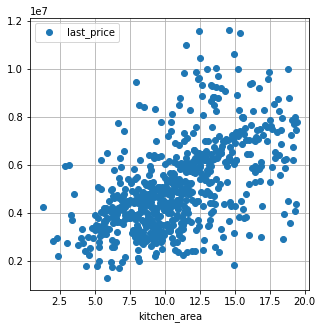

In [56]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))

<AxesSubplot:xlabel='rooms'>

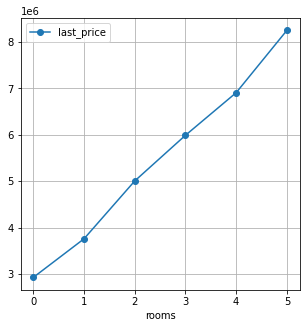

In [57]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

<AxesSubplot:xlabel='categorize_floor'>

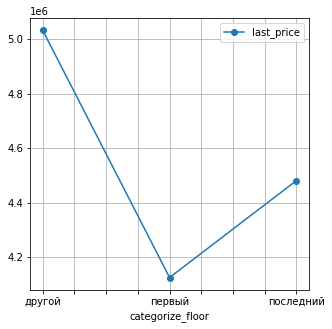

In [58]:
data.pivot_table(index='categorize_floor', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

<AxesSubplot:xlabel='weekday'>

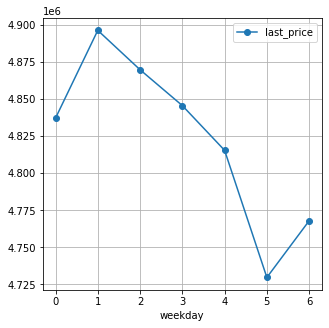

In [59]:
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

<AxesSubplot:xlabel='month'>

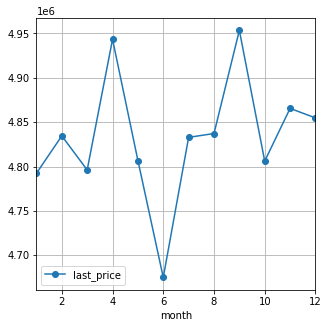

In [60]:
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(5, 5))

<AxesSubplot:xlabel='year'>

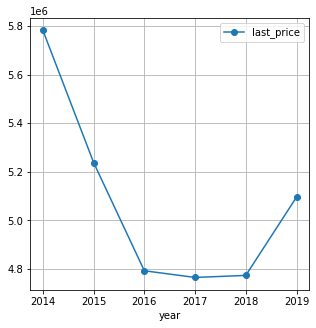

In [61]:
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

Почти прямая зависимость между ценой и общей площадью, количеством комнат. 
Слабая у цены и дня публикации, площади кухни. 
У остальных параметров слабая зависимость. 

Цена снижалась с 2014 до 2017 года до мин значения, но затем стала расти. 
Самая высокая стоимость в апреле, а низкая в июне. 
Во вторник самая высокая цена на квартиры, а в субботу минимальная. 

Стоимость квартиры зависит от ее площади: чем выше стоимость, тем дороже стоимость. 
Кол-во комнат также влияет на стоимость: чем больше комнат, тем выше цена. 
Этаж тоже влияет на цену: квартиры на 1 этаже дешевле остальных.

#### Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [62]:
average_price_per_meter = data.pivot_table(index = 'locality_name', values = 'sm_price', aggfunc=['count', 'mean'])
average_price_per_meter.columns = ['count', 'mean']
average_price_per_meter = average_price_per_meter.sort_values('count', ascending = False).head(10)
average_price_per_meter

,count,mean
locality_name,,
Санкт-Петербург,15651,114868.877339
поселок Мурино,552,85629.568641
поселок Шушары,439,78551.344647
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
поселок Парголово,327,90175.913089
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


Cамая высокая стоимость жилья в Санкт-Петербурге. Из списка топ-10 городов по средней стоимости с нб кол-вом обьявлений у Выборга цена меньше остальных вариантов.


#### Изменение стоимости квартир в Санкт-Петербурге от расстояния до центра города:

In [63]:
data.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest_km'].describe()

count    15576.000000
mean        11.567347
std          4.828655
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         26.000000
Name: cityCenters_nearest_km, dtype: float64

,last_price
cityCenters_nearest_km,
0.0,8.398000e+06
1.0,8.145277e+06
2.0,7.970519e+06
3.0,7.350003e+06
4.0,7.606618e+06
5.0,7.661225e+06
6.0,7.096569e+06
7.0,6.635321e+06
8.0,6.591220e+06


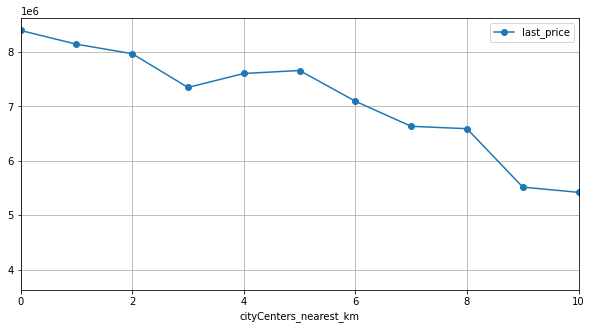

In [64]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price').plot(grid=True, style='o-', xlim=(0,10), figsize=(10, 5))
data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km<10').pivot_table(values='last_price', index='cityCenters_nearest_km')

В центре Санкт-Петербурга самые дороги квартиры. При удалении от центра цены на квартиры снижаются


### Общий вывод

В ходе исследования объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах была выполнена следующая предобработка данных:
- изучена общая информация о данных
- найдены и обработаны пропущенные значения (пропуски могли возникнуть из-за человеческого фактора (данные были удалены случайно или намерено, сотрудник не внес данные) или в результате сбоя в базе данных при выгрузке)
- изменены некорректные типы данных в столбцах (в столбцах floors_total,balcony, parks_around3000, ponds_around3000, days_exposition должен быть тип int, т.к. значения целые; в столбце first_day_exposition - object - должен быть тип datetime; в столбце is_apartment - должен быть тип bool)
- обработаны аномальные значения, округлены значения до значащих величин
- изучены уникальные значения и устранены неявные дубликаты
- добавлены столбцы с параметрами: цена одного квадратного метра; день недели публикации объявления; месяц публикации объявления; год публикации объявления; тип этажа квартиры; расстояние до центра города в километрах.

В ходе исследовательского анализа данных были изучены и описаны параметры объектов и сделаны следующие выводы:

Площадь большинства предлагаемых квартир варьируется от 30 до 70 кв.м. 
Жилая площадь большинства квартир в пределах 14 и 21 м, а также 26 и 36 м, а площадь кухонь варьируется от 5 до 15 м. 
Большинство предложений имеет площадь кухни равную 10,5 кв. м. 
Цена на большинство квартир варьируется от 2 до 6 млн., 4 млн. руб. - самая распространенная цена. 
Большую часть предложений составляют одно- и двухкомнатные квартиры,с ростом кол-ва комнат предложений становится меньше. 
Большинство вариантов имеют высоту потолков от 2,5 до 3 метров, самое распространенное - 2,65 м. 
Большинство предложенных квартир расположены между 2 и предпоследним этажом, меньше всего вариантов на 1 этаже. Больше всего квартир продается в 5-этажных домах, также много предложений в 9-этажках. 
Максимальное расстояние до центра 65 км, большинство квартир расположено в пределах 5-20 км от центра, есть 3 выделающиеся значения в пределах 5, 12 и 15 км. 
В основном расстояние до парка варьируется от 200 до 750 м.

Изучено, как быстро продавались квартиры:
Среднее время продажи квартир 156 дня, а медианное 73 дней. 
Быстрыми продажами можно считать до 150 дней. Некоторые квартиры продаются больше 230 дней, максимальное кол-во дней обьявления 1580.

Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта:
Чем выше стоимость, тем дороже стоимость. Чем больше комнат, тем выше цена. 
Этаж тоже влияет на цену: квартиры на 1 этаже дешевле остальных.
Цена снижалась с 2014 до 2017 года до мин значения, но затем стала расти. Самая высокая стоимость в апреле, а низкая в июне. Во вторник самая высокая цена на квартиры, а в субботу минимальная.


Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений показал, что самая высокая стоимость жилья в Санкт-Петербурге. Из списка топ-10 городов по средней стоимости с нб кол-вом обьявлений у Выборга цена меньше остальных вариантов. 

Расчет средней стоимости на разном удалении от центра Санкт-Петербурга показал, что самые дорогие квартиры в центре города. При удалении от центра цены на квартиры снижаются. 

